# Abutment Design

In [74]:
# Library Dependencies
%load_ext autoreload
%autoreload 2
import pyec7
import numpy as np
from scipy.integrate import trapz
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Geomety

In [75]:
# Abutment Geometry
toe_thickness = 1.50 # at the edge
toe_width = 1.65
toe_inclination = 0 # compared to horizontal (degrees)
stemwall_thickness = 1.20  # at the base
stemwall_height_front = 3.30
stemwall_height_rear = 0.50
stemwall_inclination_front = 0 # compared to vertical (degrees)
stemwall_inclination_rear = 0 # compared to vertical (degrees)
bearing_shelf = 2.00
backwall_thickness = 0.50
backwall_height_front = 2.20
backwall_height_rear = 2.50
heel_thickness = 1.50 # at the edge
heel_width = 2.65
heel_inclination = 0 # compared to horizontal (degrees)

# Bearing Location
bearing_point = 0.5*bearing_shelf

# Soil Geometry
toefill_thickness = 0.50 # at the wall
toefill_inclination = 0 # compared to horizontal (degrees)
backfill_inclination = 0 # compared to horizontal (degrees)

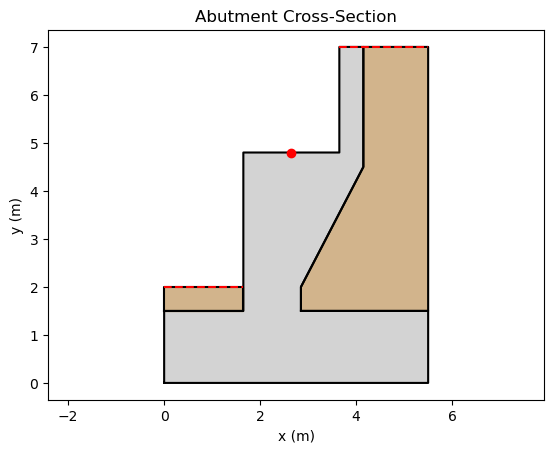

Wall:
 [[0.   0.  ]
 [0.   1.5 ]
 [1.65 1.5 ]
 [1.65 4.8 ]
 [3.65 4.8 ]
 [3.65 7.  ]
 [4.15 7.  ]
 [4.15 4.5 ]
 [2.85 2.  ]
 [2.85 1.5 ]
 [5.5  1.5 ]
 [5.5  0.  ]
 [0.   0.  ]]

Toe fill:
 [[0.   1.5 ]
 [0.   2.  ]
 [1.65 2.  ]
 [1.65 1.5 ]
 [0.   1.5 ]]

Backfill:
 [[2.85 1.5 ]
 [2.85 2.  ]
 [4.15 4.5 ]
 [4.15 7.  ]
 [5.5  7.  ]
 [5.5  1.5 ]
 [2.85 1.5 ]]

Bearing:
 [2.65 4.8 ]

Toe load:
 [[0.   2.  ]
 [1.65 2.  ]]

Back load:
 [[3.65 7.  ]
 [5.5  7.  ]]


In [78]:
# Geometry computations

# Abutment
footing_width = toe_width + stemwall_thickness + heel_width
abutment_dcoord1 = np.array([
    [0, toe_thickness],
    [toe_width, toe_width*np.tan(np.deg2rad(toe_inclination))],
    [stemwall_height_front*np.tan(np.deg2rad(stemwall_inclination_front)), stemwall_height_front],
    [bearing_shelf, 0],
    [0, backwall_height_front],
    [backwall_thickness, backwall_thickness*np.tan(np.deg2rad(backfill_inclination))],
    [0, -backwall_height_rear]
])
abutment_dcoord2 = np.array([
    [footing_width, 0],
    [0, heel_thickness],
    [-heel_width, heel_thickness*np.tan(np.deg2rad(heel_inclination))],
    [-stemwall_height_rear*np.tan(np.deg2rad(stemwall_inclination_rear)), stemwall_height_rear]
])
abutment_coord = np.vstack([
    [0,0],
    np.cumsum(abutment_dcoord1, axis=0),
    np.cumsum(abutment_dcoord2, axis=0)[::-1],
    [0,0]
])

# Toe
toefill_dcoord = np.array([
    [0,toe_thickness],
    [toe_width, toe_width*np.tan(np.deg2rad(toe_inclination))],
    [toefill_thickness*np.tan(np.deg2rad(stemwall_inclination_front)), toefill_thickness],
    [-toe_width-toefill_thickness*np.tan(np.deg2rad(stemwall_inclination_front)),
        (toe_width+toefill_thickness*np.tan(np.deg2rad(stemwall_inclination_front)))*np.tan(np.deg2rad(toefill_inclination))],
])
toefill_coord = np.vstack([
    [0,toe_thickness],
    np.cumsum(toefill_dcoord, axis=0)[::-1]
])
toefill_height = toefill_coord[1,1]

# Backfill
backfill_width = footing_width - abutment_coord[6,0]
backfill_height = abutment_coord[6,1] + backfill_width*np.tan(np.deg2rad(backfill_inclination))
backfill_coord = np.vstack([
    abutment_coord[6:10][::-1],
    [footing_width,backfill_height],
    abutment_coord[9:11][::-1],
])

# Loads
bearing_coord = abutment_coord[3] + [bearing_point,0]
toeload_coord = np.vstack([
    toefill_coord[1],
    toefill_coord[2]
])
backload_coord = np.vstack([
    abutment_coord[5],
    backfill_coord[4]
])

# Plot
plt.plot(abutment_coord[:,0], abutment_coord[:,1], 'k-')
plt.fill(abutment_coord[:,0], abutment_coord[:,1], color='lightgray')
plt.plot(toefill_coord[:,0], toefill_coord[:,1], 'k-')
plt.fill(toefill_coord[:,0], toefill_coord[:,1], color='tan')
plt.plot(backfill_coord[:,0], backfill_coord[:,1], 'k-')
plt.fill(backfill_coord[:,0], backfill_coord[:,1], color='tan')
plt.plot(bearing_coord[0], bearing_coord[1], 'ro')
plt.plot(toeload_coord[:,0], toeload_coord[:,1], 'r--')
plt.plot(backload_coord[:,0], backload_coord[:,1], 'r--')
plt.axis('equal')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Abutment Cross-Section')
plt.show()

# Print
print("Wall:\n",abutment_coord)
print("\nToe fill:\n",toefill_coord)
print("\nBackfill:\n",backfill_coord)
print("\nBearing:\n",bearing_coord)
print("\nToe load:\n",toeload_coord)
print("\nBack load:\n",backload_coord)

## Weights

In [ ]:
# Unit Weights
gamma_c = 25
gamma_f = 18

# Loads
q_toe = 2
q_backfill = 5
P_bearing = 500

In [51]:
# Load computations

# Abutment
abutment_area = trapz(abutment_coord[:,1],abutment_coord[:,0])
abutment_moment = trapz(abutment_coord[:,0]*abutment_coord[:,1],abutment_coord[:,0])
W_a = gamma_c * abutment_area
M_a = gamma_c * abutment_moment
x_a = M_a / W_a
print("Abutment:\nW_a =",W_a,"kN\nx_a =",x_a,"m")

# Toe Fill
toefill_area = trapz(toefill_coord[:,1],toefill_coord[:,0])
toefill_moment = trapz(toefill_coord[:,0]*toefill_coord[:,1],toefill_coord[:,0])
W_tf = gamma_f * toefill_area
M_tf = gamma_f * toefill_moment
x_tf = M_tf / W_tf
print("\nToe Fill:\nW_tf =",W_tf,"kN\nx_tf =",x_tf,"m")

# Backfill
backfill_area = trapz(backfill_coord[:,1],backfill_coord[:,0])
backfill_moment = trapz(backfill_coord[:,0]*backfill_coord[:,1],backfill_coord[:,0])
W_bf = gamma_f * backfill_area
M_bf = gamma_f * backfill_moment
x_bf = M_bf / W_bf
print("\nBackill:\nW_bf =",W_bf,"kN\nx_bf =",x_bf,"m")

# Toe Load
F_tl = q_toe * (toeload_coord[1,0] - toeload_coord[0,0])
x_tl = 0.5 * (toeload_coord[1,0] + toeload_coord[0,0])
M_tl = F_tl * x_tl
print("\nToe Load:\nF_tl =",F_tl,"kN\nx_tl =",x_tl,"m")

# Backfill Load
F_bl = q_backfill * (backload_coord[1,0] - backload_coord[0,0])
x_bl = 0.5 * (backload_coord[1,0] + backload_coord[0,0])
M_bl = F_bl * x_bl
print("\nBackfill Load:\nF_bl =",F_bl,"kN\nx_bl =",x_bl,"m")

# Bearing Load
P_b = P_bearing
M_b = P_bearing * bearing_coord[0]
x_b = M_b / P_b
print("\nBearing Load:\nP_b =",F_bl,"kN\nx_b =",x_b,"m")

Abutment:
W_a = 383.125 kN
x_a = 2.733034257748777 m

Toe Fill:
W_tf = 14.850000000000003 kN
x_tf = 0.8249999999999998 m

Backill:
W_bf = 246.14999999999995 kN
x_bf = 4.492870201096894 m

Toe Load:
F_tl = 3.3 kN
x_tl = 0.825 m

Backfill Load:
F_bl = 9.25 kN
x_bl = 4.575 m

Bearing Load:
P_b = 9.25 kN
x_b = 2.65 m


## Soil Parameters

In [52]:
# Fill
phi_f = 32
coh_f = 0

# Subsoil
gamma_s = 20
phi_s = 0
coh_s = 150

## Geotechnical Computations

In [53]:
# Earth Pressure Computations

# Active
print("Active Pressures:")
Ka = pyec7.earth_pressures( friction=phi_f, cohesion=coh_f,
    delta=0, beta=backfill_inclination, theta=0, active=True,
    surcharge=q_backfill, inclination=0,
    log=True )
F_a = 0.5 * Ka[3] * gamma_f * backfill_height**2
y_a = backfill_height / 3
M_a = F_a * y_a
print("\nResults:\nF_a =", F_a, "\ny_a =", y_a)

# Passive
print("\n\nPassive Pressures:")
Kp = pyec7.earth_pressures( friction=phi_f, cohesion=coh_f,
    delta=0, beta=backfill_inclination, theta=0, active=False,
    surcharge=q_backfill, inclination=0,
    log=True )
F_p = 0.5 * Kp[3] * gamma_f * toefill_height**2
y_p = toefill_height / 3
M_p = F_p * y_p
print("\nResults:\nF_p =", F_p, "\ny_p =", y_p)

Active Pressures:
Input parameters:
phi = 32 deg
c = 0 kPa
a = 0.0 kPa
delta = 0 deg
beta = 0 deg
theta = 0 deg
q = 5 kPa
p = 5.0 kPa

Boundary conditions:
mw = 61.0 deg
v = 0.0 deg
mt = 61.0 deg

Coefficients:
Kn = 0.3072585245224685
Kq = 0.3072585245224685
Kc = 1.1086181029055378
Kg = 0.3072585245224685

Results:
F_a = 135.5010093144086 
y_a = 2.3333333333333335


Passive Pressures:
Input parameters:
phi = 32 deg
c = 0 kPa
a = 0.0 kPa
delta = 0 deg
beta = 0 deg
theta = 0 deg
q = 5 kPa
p = 5.0 kPa

Boundary conditions:
mw = 29.000000000000004 deg
v = 0.0 deg
mt = 29.000000000000004 deg

Coefficients:
Kn = 3.254588303299863
Kq = 3.254588303299863
Kc = 3.608095510542847
Kg = 3.254588303299863

Results:
F_p = 117.16517891879506 
y_p = 0.6666666666666666


In [ ]:
# Total Load Computations
# Safety Factors
gamma_G = 1.35
gamma_Q = 1.50
gamma_R = 1.40

# Total Vertical Load
V = gamma_G * (W_a + W_bf + W_tf) + gamma_Q * (F_bl + F_tl) + gamma_Q * P_b

# Total Horizontal Load
H = gamma_G * F_a

# Moment at the base of the abutment
M = gamma_G * M_a - 1.0 * (M_a + M_bf + M_tf) - 0.0 * (M_bl + M_tl) - 1.0 * M_b

print(f"Total Vertical Load (V): {V} kN")
print(f"Total Horizontal Load (H): {H} kN")
print(f"Moment at the base of the abutment (M): {M} kNm")

Total Vertical Load (V): 1638.3937500000002 kN
Total Horizontal Load (H): 182.92636257445162 kN
Moment at the base of the abutment (M): -2332.512092393233 kNm


In [55]:
# Bearing capacity computations
pyec7.bearing_resistance( width=footing_width, length=0,
    embedment=toefill_height, inclination=0,
    unit_weight=gamma_s, friction=phi_s, cohesion=coh_s,
    vertical=V,
    horizontal=H, moment=M,
    surcharge=q_toe,
    log=True,)

Geometry:
B = 5.5 m
L = 0 m
D = 2.0 m
a = 0 deg

Soil Properties:
gamma = 20 kN/m3
phi = 0 deg
c = 150 kPa

Loading:
V = 1638.3937500000002 kN
HB = 182.92636257445162 kN
HL = 0 kN
H = 182.92636257445162 kN
MB = 2332.512092393233 kNm
ML = 0 kNm
q = 42.0 kPa

Effective Dimensions:
eB = 1.423657830965989 m
eL = 0.0 m
Be = 2.652684338068022 m
Le = 0.0 m
Ae = 2.652684338068022 m2

Bearing Capacity Factors:
Nq = 0.9999999999999998
Nc = 5.141592653589793
Ng = -0.0

Inclination Factors:
bq = 1.0
bc = 1.0
bg = 1.0

Shape Factors:
sq = 1
sc = 1
sg = 1

Load Inclination Factors:
iq = 1
ic = 0.8675165221944039
ig = 1

Results:
qu = 711.0624866073771 kPa
R = 1886.2243216110917 kN


1886.2243216110917

# Design

In [ ]:
print()

## Stiffness

In [70]:
# Soil Properties
su = coh_s
Gmax = 1500 * su
G = (2/3) * Gmax
g = 9.81
rho = gamma_s/g
Vs = np.sqrt(G/rho)
nu = 0.45
print("Soil Properties:")
print("su =", su, "kPa")
print("Gmax =", Gmax, "kPa")
print("G =", G, "kPa")
print("Vs =", Vs, "m/s")
print("nu =", nu)

# Footing Properties
B = 0.5 * footing_width
D = toefill_height
d = toe_thickness
print("\nFooting Properties:")
print("B =", B, "m")
print("D =", D, "m")
print("d =", d, "m")

# Frequency
print("\nVibration Frequency:")
f = 0
omega = 2 * np.pi * f
ao = omega*B/Vs
print("f =", f, "Hz")
print("ao =", ao)

Soil Properties:
su = 150 kPa
Gmax = 225000 kPa
G = 150000.0 kPa
Vs = 271.2471198003769 m/s
nu = 0.45

Footing Properties:
B = 2.75 m
D = 2.0 m
d = 1.5 m

Vibration Frequency:
f = 0 Hz
ao = 0.0


In [71]:
# Rotational Stiffness

# Surface
Krx_surf = (np.pi/2) * G*B**2 / (1-nu) # Gazetas (1991) - Table 15.3
# The above coefficient is 1.57, compared to 1.49 in Table 15.1, and 1.60 in Pais & Kausel (1988)
print("Krx_surf = ", Krx_surf, "kNm/m/rad")

# Embedment Depth Correction Factor
krx_embed = 1 + 1.26 * d/B # Gazertas (1991) - Table 15.2
# The above coefficient in Pais & Kausel (1988) is 1.0, but D/B is used.
print("krx_embed = ", krx_embed)

# Dynamic Stiffness Coefficient
krx_dyn = 1-0.2*ao # Gazetas (1991) - Table 15.1
print("krx_dyn = ", krx_dyn)

# Dynamic Stiffness
Krx_dyn = krx_embed * krx_dyn * Krx_surf
print("Krx_dyn = ", Krx_dyn, "kNm/m/rad")

Krx_surf =  3239767.424014474 kNm/m/rad
krx_embed =  1.6872727272727275
krx_dyn =  1.0
Krx_dyn =  5466371.21724624 kNm/m/rad
